# Contents:
1. Import Libraries
2. Import Data
3. Regression Analysis

# 01. Import Libraries

In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically
%matplotlib inline

# 02. Import Data

In [3]:
# define path
path = r'/Users/lavinia/Documents/07-2023 Air Fare Analysis'

In [4]:
# import cleaned data set
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_outliers_dataset.csv'), index_col = False)

# 03. Regression Analysis

In [5]:
df.head()

,Date of Booking,Booking Day,Date of Journey,Journey Day,Days_left,Airline,Flight Code,Flight Class,Departure_Time,Departure Location,Departure_TimeCategory,Arrival_Time,Arrival Location,Arrival_TimeCategory,Duration (in min),Total Stops,Price,Distance_km,Price_km_adjusted,Distance_cat
0,2023-01-15,Sunday,2023-01-16,Monday,1,SpiceJet,SG-8169,Economy,20:00,Delhi,After 6 PM,22:05,Mumbai,After 6 PM,125,0,5335,1148,4.647213,801 - 1200km
1,2023-01-15,Sunday,2023-01-16,Monday,1,Indigo,6E-2519,Economy,23:00,Delhi,After 6 PM,01:20,Mumbai,Before 6 AM,140,0,5899,1148,5.138502,801 - 1200km
2,2023-01-15,Sunday,2023-01-16,Monday,1,GO FIRST,G8- 354,Economy,22:30,Delhi,After 6 PM,00:40,Mumbai,Before 6 AM,130,0,5801,1148,5.053136,801 - 1200km
3,2023-01-15,Sunday,2023-01-16,Monday,1,SpiceJet,SG-8709,Economy,18:50,Delhi,After 6 PM,20:55,Mumbai,After 6 PM,125,0,5794,1148,5.047038,801 - 1200km
4,2023-01-15,Sunday,2023-01-16,Monday,1,Air India,AI-805,Economy,20:00,Delhi,After 6 PM,22:10,Mumbai,After 6 PM,130,0,5955,1148,5.187282,801 - 1200km


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439199 entries, 0 to 439198
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date of Booking         439199 non-null  object 
 1   Booking Day             439199 non-null  object 
 2   Date of Journey         439199 non-null  object 
 3   Journey Day             439199 non-null  object 
 4   Days_left               439199 non-null  int64  
 5   Airline                 439199 non-null  object 
 6   Flight Code             439199 non-null  object 
 7   Flight Class            439199 non-null  object 
 8   Departure_Time          439199 non-null  object 
 9   Departure Location      439199 non-null  object 
 10  Departure_TimeCategory  439199 non-null  object 
 11  Arrival_Time            439199 non-null  object 
 12  Arrival Location        439199 non-null  object 
 13  Arrival_TimeCategory    439199 non-null  object 
 14  Duration (in min)   

In [7]:
df.shape

(439199, 20)

In [8]:
# drop unwanted columns from df
df = df.drop(columns=['Date of Booking', 'Booking Day', 'Date of Journey', 'Flight Code', 'Departure_TimeCategory', 'Arrival_Time', 'Arrival_TimeCategory', 'Price_km_adjusted', 'Distance_cat'])

In [9]:
df.head()

,Journey Day,Days_left,Airline,Flight Class,Departure_Time,Departure Location,Arrival Location,Duration (in min),Total Stops,Price,Distance_km
0,Monday,1,SpiceJet,Economy,20:00,Delhi,Mumbai,125,0,5335,1148
1,Monday,1,Indigo,Economy,23:00,Delhi,Mumbai,140,0,5899,1148
2,Monday,1,GO FIRST,Economy,22:30,Delhi,Mumbai,130,0,5801,1148
3,Monday,1,SpiceJet,Economy,18:50,Delhi,Mumbai,125,0,5794,1148
4,Monday,1,Air India,Economy,20:00,Delhi,Mumbai,130,0,5955,1148


In [10]:
# convert departure time to datetime objects
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'], format = '%H:%M')

In [11]:
# calculate the time difference in minutes since midnight
df['Minutes_since_Midnight_DT'] = df['Departure_Time'].dt.hour*60 + df['Departure_Time'].dt.minute

In [12]:
# drop Departure_Time column
df.drop(columns=['Departure_Time'], inplace = True)

In [13]:
df.head()

,Journey Day,Days_left,Airline,Flight Class,Departure Location,Arrival Location,Duration (in min),Total Stops,Price,Distance_km,Minutes_since_Midnight_DT
0,Monday,1,SpiceJet,Economy,Delhi,Mumbai,125,0,5335,1148,1200
1,Monday,1,Indigo,Economy,Delhi,Mumbai,140,0,5899,1148,1380
2,Monday,1,GO FIRST,Economy,Delhi,Mumbai,130,0,5801,1148,1350
3,Monday,1,SpiceJet,Economy,Delhi,Mumbai,125,0,5794,1148,1130
4,Monday,1,Air India,Economy,Delhi,Mumbai,130,0,5955,1148,1200


In [14]:
# check for categorical column
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
print(f'Categorical Columns: {cat_cols}')

Categorical Columns: ['Journey Day', 'Airline', 'Flight Class', 'Departure Location', 'Arrival Location']


In [15]:
# converting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder

In [16]:
# create a LabelEncoder object 
label_encoder = LabelEncoder()

# apply the LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = label_encoder.fit_transform(df[col])
        
df.head()

,Journey Day,Days_left,Airline,Flight Class,Departure Location,Arrival Location,Duration (in min),Total Stops,Price,Distance_km,Minutes_since_Midnight_DT
0,1,1,6,1,3,6,125,0,5335,1148,1200
1,1,1,5,1,3,6,140,0,5899,1148,1380
2,1,1,4,1,3,6,130,0,5801,1148,1350
3,1,1,6,1,3,6,125,0,5794,1148,1130
4,1,1,0,1,3,6,130,0,5955,1148,1200


In [17]:
df.corr()

,Journey Day,Days_left,Airline,Flight Class,Departure Location,Arrival Location,Duration (in min),Total Stops,Price,Distance_km,Minutes_since_Midnight_DT
Journey Day,1.000000,-0.058654,-0.006805,-0.001435,-0.002770,-0.004428,-0.000146,0.000152,-0.002813,0.003939,-0.002745
Days_left,-0.058654,1.000000,0.005820,-0.032548,-0.012401,0.010093,-0.030393,0.005684,-0.056458,-0.006614,-0.008028
Airline,-0.006805,0.005820,1.000000,0.328488,-0.042850,-0.027715,0.003097,0.029544,0.027798,-0.036452,-0.019823
Flight Class,-0.001435,-0.032548,0.328488,1.000000,-0.022935,-0.018750,0.074709,0.089779,-0.522177,-0.040405,-0.015241
Departure Location,-0.002770,-0.012401,-0.042850,-0.022935,1.000000,-0.174635,-0.029807,0.028896,0.022252,-0.006173,0.040061
Arrival Location,-0.004428,0.010093,-0.027715,-0.018750,-0.174635,1.000000,-0.031430,-0.006099,0.029040,0.017906,-0.017053
Duration (in min),-0.000146,-0.030393,0.003097,0.074709,-0.029807,-0.031430,1.000000,0.490660,0.199627,-0.008864,0.129185
Total Stops,0.000152,0.005684,0.029544,0.089779,0.028896,-0.006099,0.490660,1.000000,0.136077,0.016408,-0.051304
Price,-0.002813,-0.056458,0.027798,-0.522177,0.022252,0.029040,0.199627,0.136077,1.000000,-0.001396,0.024349
Distance_km,0.003939,-0.006614,-0.036452,-0.040405,-0.006173,0.017906,-0.008864,0.016408,-0.001396,1.000000,0.020924


In [18]:
# drop columns with very low correlations
df.drop(columns = ['Journey Day', 'Distance_km'], inplace = True)
df.head()

,Days_left,Airline,Flight Class,Departure Location,Arrival Location,Duration (in min),Total Stops,Price,Minutes_since_Midnight_DT
0,1,6,1,3,6,125,0,5335,1200
1,1,5,1,3,6,140,0,5899,1380
2,1,4,1,3,6,130,0,5801,1350
3,1,6,1,3,6,125,0,5794,1130
4,1,0,1,3,6,130,0,5955,1200


## Data preparation before regression analysis

In [19]:
from sklearn.model_selection import train_test_split

# define predictor and target variables
X = df.drop('Price', axis=1)
y = df['Price']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler

# create StandardScaler object
scaler = StandardScaler()

# apply StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Regression analysis

In [20]:
from sklearn.linear_model import LinearRegression

# create a linear regression model and fit the data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# predict the fares using X_test
y_predicted = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# evaluate the model using R2
r2 = r2_score(y_test, y_predicted)
print('R-squared score:', r2)

# evaluate the model using rmse
rmse = mean_squared_error(y_test, y_predicted)
print('Root Mean Squared Error:', rmse)

R-squared score: 0.3909873011052811
Root Mean Squared Error: 217850559.70740467


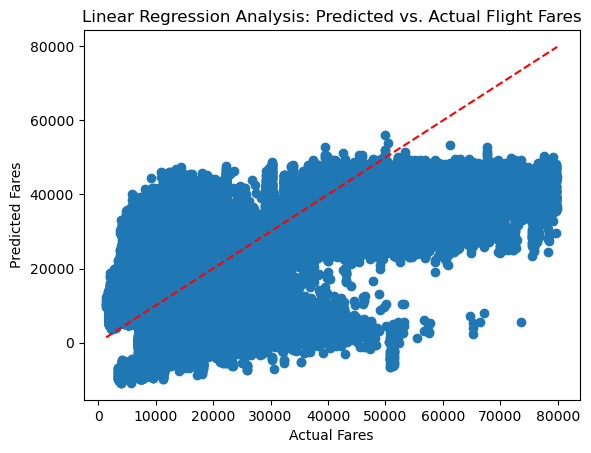

In [30]:
# create a scatterplot with the actual target values on the y-axis and the predicted values on the x-axis

plt.scatter(y_test, y_predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.xlabel("Actual Fares")
plt.ylabel("Predicted Fares")
plt.title("Linear Regression Analysis: Predicted vs. Actual Flight Fares")
plt.show()

In [25]:
# create a dataframe comparing the actual and predicted values of y
data_regression = pd.DataFrame({'Actual':y_test, 'Predicted':y_predicted})

In [29]:
# export data
data_regression.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'regression_result.csv'), index = False)

Observation:

In a predicted vs actual plot (scatterplot), where the y-axis represents predicted values and the x-axis represents actual values, the diagonal line represenrs the line of perfect prediction. This means that every point on the line has the same x and y values, indicating that the model's predictions perfectly match the actual values.

Deviations from this diagonal line represents model prediction errors. Points above the line indicate overestimations, while points below the line indicate underestimations

The goal in regression analysis is to have data points as close to the diagonal line as possible, indicating that the model predictions are accurate and align with the actual data.

Focus:
The linear regression model is not performing well on the dataset:
- Model Fit: R-squared score of 0.391 means the linear regression model explains only about 39.1% of the variability in the fare prices, therefore there is still significant amount of unexplained variability that the model does not account for.
- Scale of predictions: RMSE value of 217,848,486 suggests that on average, the linear model have an error of about 217,848,486 units when compared to actual values, indicating that the model's predictions are substantially different from actual values.
- Feature relevance: The features we are using in the model are not strongly related to the target variable and not linearly related. If the features lack predictive power or are not linearly related to the taregt, it can lead to poor model performance.
